In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [48]:
data = pd.read_csv('data/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
data = np.array(data)
m, n = data.shape

np.random.shuffle(data)

total_data = data[0:1000].T
X_total = total_data[1:n]
y_total = total_data[0]
X_total = X_total / 255.

train_data = data[1000:m].T
X_train = train_data[1:n]
y_train = train_data[0]
X_train = X_train / 255.

In [50]:
X_train[:, 0].shape

(784,)

In [51]:
def ReLU(z):
    # Go thru each ele in "z" and return z if z > 0 and return 0 else
    return np.maximum(z, 0)

def softmax(z):
    # Return prediction values that are between 0 and 1
    # np.sum preserves the no.of cols and collapses the no.of rows into 1 (basic stuff)
    # A = np.exp(Z) / sum(np.exp(Z))
    # return A
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))  # for stability
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

def one_hot_encoder(y):
    one_hot_y = np.zeros((y.size, y.max()+1))
    # index thru one_hot_y and arange (np.arange(y.size))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

def derivative_ReLU(z):
    # based on slope
    return z > 0

In [52]:
def get_predictions(a2):
    return np.argmax(a2, 0)

def get_accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions == y) / y.size

In [53]:
def init_params():
    # params of layer 1 (hidden layer)
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    # params of output layer
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

def fwd_prop(w1, b1, w2, b2, X):
    # for first hidden layer
    a0 = X
    z1 = w1.dot(a0) + b1
    a1 = ReLU(z1)
    # for the output layer
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def bwd_prop(z1, a1, z2, a2, w1, w2, X, y):
    # one-hot encoding y
    one_hot_y = one_hot_encoder(y)
    dz2 = a2 - one_hot_y
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * derivative_ReLU(z1)
    dw1 = 1 / m * dz1.dot(X.T)
    db1 = 1 / m * np.sum(dz1)
    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    new_w1 = w1 - alpha * dw1
    new_b1 = b1 - alpha * db1
    new_w2 = w2 - alpha * dw2
    new_b2 = b2 - alpha * db2
    return new_w1, new_b1, new_w2, new_b2

In [54]:
def gradient_descent(X, y, iters, alpha):
    w1, b1, w2, b2 = init_params()
    for i in range(iters):
        z1, a1, z2, a2 = fwd_prop(w1, b1, w2, b2, X)
        dw1, db1, dw2, db2 = bwd_prop(z1, a1, z2, a2,w1, w2, X, y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 100 == 0:
            print("Iterations: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(a2), y))
    return w1, b1, w2, b2

In [55]:
w1, b1, w2, b2 = gradient_descent(X_train, y_train, 1000, 0.1)

Iterations:  0
[3 7 7 ... 2 2 2] [4 8 1 ... 4 9 9]
Accuracy:  0.08912195121951219
Iterations:  100
[9 8 1 ... 4 9 9] [4 8 1 ... 4 9 9]
Accuracy:  0.7030731707317073
Iterations:  200
[4 8 1 ... 4 9 9] [4 8 1 ... 4 9 9]
Accuracy:  0.7913658536585366
Iterations:  300
[4 8 1 ... 4 9 9] [4 8 1 ... 4 9 9]
Accuracy:  0.8255853658536585
Iterations:  400
[4 8 1 ... 4 9 9] [4 8 1 ... 4 9 9]
Accuracy:  0.8453170731707317
Iterations:  500
[4 8 1 ... 4 9 9] [4 8 1 ... 4 9 9]
Accuracy:  0.8577317073170732
Iterations:  600
[4 8 1 ... 4 9 9] [4 8 1 ... 4 9 9]
Accuracy:  0.8662682926829268
Iterations:  700
[4 8 1 ... 4 9 9] [4 8 1 ... 4 9 9]
Accuracy:  0.8730243902439024
Iterations:  800
[4 8 1 ... 4 9 9] [4 8 1 ... 4 9 9]
Accuracy:  0.8789024390243902
Iterations:  900
[4 8 1 ... 4 9 9] [4 8 1 ... 4 9 9]
Accuracy:  0.8827804878048781


In [56]:
def make_predictions(X, w1, b1, w2, b2):
    _, _, _, a2 = fwd_prop(w1, b1, w2, b2, X)
    predictions = get_predictions(a2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], w1, b1, w2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


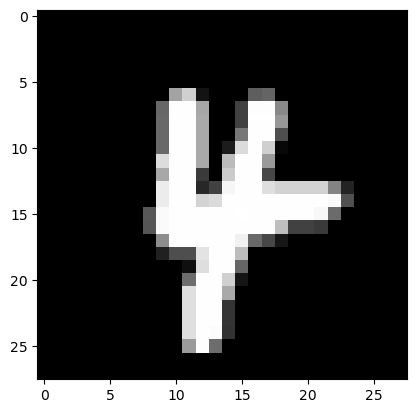

Prediction:  [8]
Label:  8


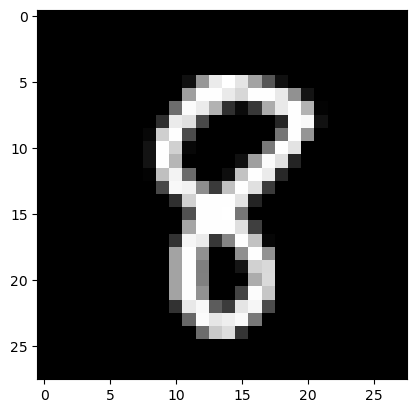

Prediction:  [1]
Label:  1


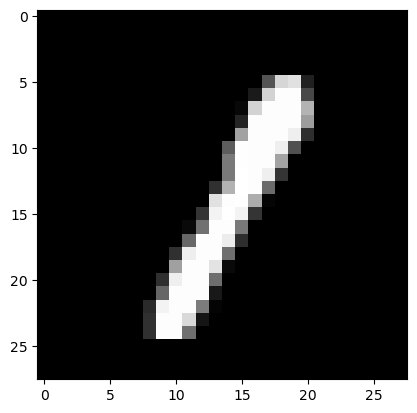

Prediction:  [3]
Label:  3


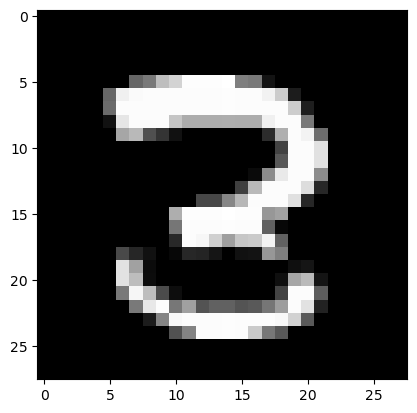

Prediction:  [7]
Label:  7


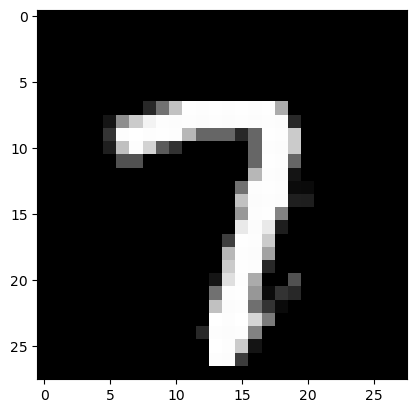

Prediction:  [0]
Label:  0


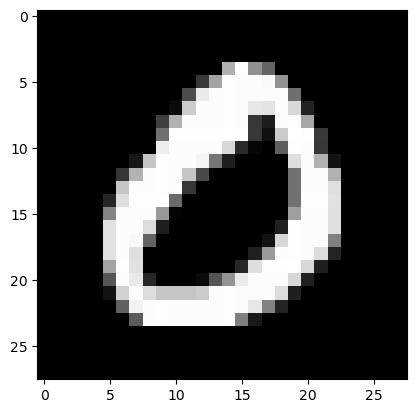

Prediction:  [1]
Label:  1


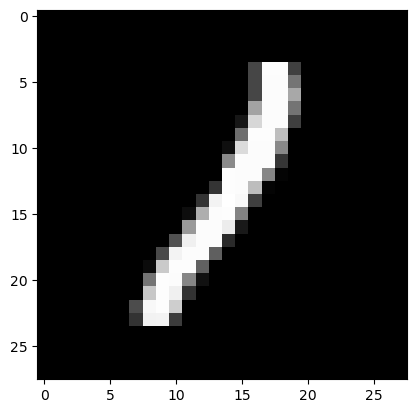

In [57]:
test_prediction(0, w1, b1, w2, b2)
test_prediction(1, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)
test_prediction(66, w1, b1, w2, b2)
test_prediction(7, w1, b1, w2, b2)
test_prediction(25, w1, b1, w2, b2)